<a href="https://colab.research.google.com/github/ajeet966/Machinelearning/blob/main/majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection Major Project**

# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import in EXCEL format


In [2]:
data = pd.read_excel('/content/realdata.xlsx')
data.head(5)

,cc_num,merchant,category,amt,first,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703190000000000,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,630423000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,38859500000000,fraud_Lind-Buckridge,entertainment,220.11,Edward,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3534090000000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,375534000000000,fraud_Keeling-Crist,misc_pos,41.96,Tyler,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Transformation

In [3]:
data.shape

(5000, 19)

In [4]:
data.isna().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
first,0
gender,0
street,0
city,0
state,0
zip,0


In [5]:
data.isna().describe()

,cc_num,merchant,category,amt,first,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [6]:
data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      5000 non-null   int64  
 1   merchant    5000 non-null   object 
 2   category    5000 non-null   object 
 3   amt         5000 non-null   float64
 4   first       5000 non-null   object 
 5   gender      5000 non-null   object 
 6   street      5000 non-null   object 
 7   city        5000 non-null   object 
 8   state       5000 non-null   object 
 9   zip         5000 non-null   int64  
 10  lat         5000 non-null   float64
 11  long        5000 non-null   float64
 12  city_pop    5000 non-null   int64  
 13  job         5000 non-null   object 
 14  trans_num   5000 non-null   object 
 15  unix_time   5000 non-null   int64  
 16  merch_lat   5000 non-null   float64
 17  merch_long  5000 non-null   float64
 18  is_fraud    5000 non-null   int64  
dtypes: float64(5), int64(5), ob

# Data Preprocessing

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert all entries in the categorical columns to strings
categorical_columns = data.select_dtypes(include=['object', 'float']).columns
data[categorical_columns] = data[categorical_columns].astype(str)

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print(data.head())


             cc_num  merchant  category   amt  first  gender  street  city  \
0  2703190000000000       513         8  1848    149       0     507   482   
1      630423000000       241         4   215    285       0     394   555   
2    38859500000000       389         0  1182    104       1     540   429   
3  3534090000000000       359         2  2020    150       1     828    81   
4   375534000000000       297         9  1924    311       1     379   202   

   state    zip  lat  long  city_pop  job  trans_num   unix_time  merch_lat  \
0     26  28654  257   395      3495  347        223  1325376018       1505   
1     46  99160  861   100       149  402        592  1325376044       4968   
2     12  83252  654    78      4154  286       3117  1325376051       4197   
3     25  59632  832    75      1939  307       2067  1325376076       4849   
4     44  24433  348   343        99  105       3164  1325376186       2169   

   merch_long  is_fraud  
0        2537         0  
1   

In [9]:
data.isna().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
first,0
gender,0
street,0
city,0
state,0
zip,0


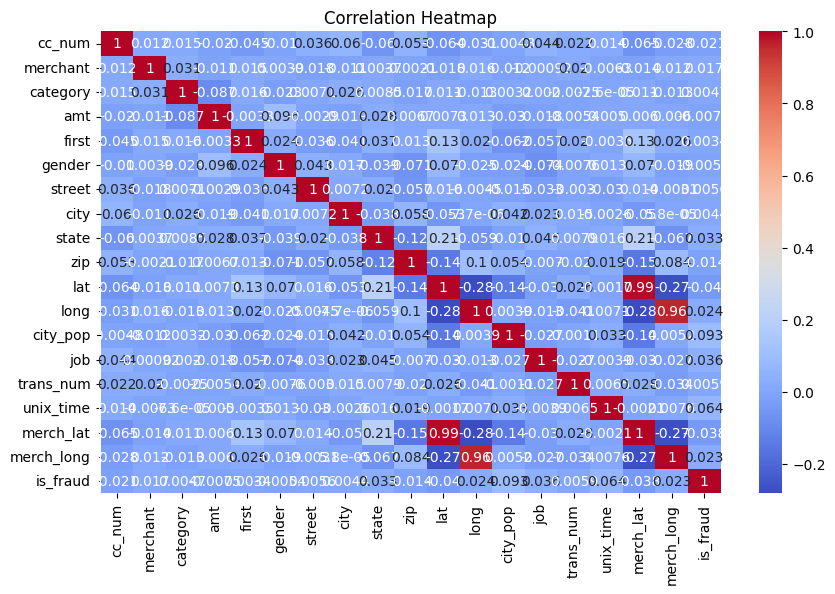

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X = data.iloc[:, :-1]  # All columns except the last one
X.head(5)

,cc_num,merchant,category,amt,first,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long
0,2703190000000000,513,8,1848,149,0,507,482,26,28654,257,395,3495,347,223,1325376018,1505,2537
1,630423000000,241,4,215,285,0,394,555,46,99160,861,100,149,402,592,1325376044,4968,614
2,38859500000000,389,0,1182,104,1,540,429,12,83252,654,78,4154,286,3117,1325376051,4197,453
3,3534090000000000,359,2,2020,150,1,828,81,25,59632,832,75,1939,307,2067,1325376076,4849,469
4,375534000000000,297,9,1924,311,1,379,202,44,24433,348,343,99,105,3164,1325376186,2169,1915


In [12]:
y = data.iloc[:, -1]
y.head(5)

,is_fraud
0,0
1,0
2,0
3,0
4,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(4000, 18)

In [15]:
X_test.shape

(1000, 18)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iterate through columns and apply LabelEncoder to categorical ones
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Check if column is categorical
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])  # Use the same encoder for test data

print(X_train)

                   cc_num  merchant  category   amt  first  gender  street  \
2913  4989850000000000000       563        10  2006    313       0     188   
3275       30143500000000       482        12   971    206       0     405   
775   4756040000000000000       137         9  1004    114       1     864   
217      4171400000000000       542         4  3629     24       0     289   
1245     2719500000000000        39         7   662    277       0     722   
...                   ...       ...       ...   ...    ...     ...     ...   
4931  4855490000000000000       304        11  3889    150       1     230   
3264     6593940000000000       132         6   337    211       0     215   
1653     3527540000000000       123         5  3320    299       0     260   
2607  4319580000000000000       217         4   547    179       0       7   
2732     4377340000000000       462         2  2455    238       1     190   

      city  state    zip  lat  long  city_pop  job  trans_num  

In [17]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print(y_train)

[0 0 0 ... 0 0 0]


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 3.42941538  1.12035771  0.98904794 ...  0.17080096 -1.14255818
  -0.11835319]
 [-0.3237699   0.71386188  1.50789277 ...  0.45837148  0.19548921
  -0.60874635]
 [ 3.25355086 -1.01750925  0.72962553 ... -1.03312189 -0.94754194
   1.43131695]
 ...
 [-0.32113927 -1.08776778 -0.30806411 ... -0.69184934 -1.25568148
  -0.02597035]
 [ 2.9252594  -0.61603188 -0.56748653 ... -0.1758614  -0.3791494
   0.06571789]
 [-0.32050007  0.61349254 -1.08633135 ... -0.01928761 -0.6137241
   0.36231545]]


In [19]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
print(y_train)

[[-0.06337243]
 [-0.06337243]
 [-0.06337243]
 ...
 [-0.06337243]
 [-0.06337243]
 [-0.06337243]]


# Using LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check and reshape target variables if necessary
if len(y_train.shape) > 1:
    y_train = y_train.ravel()
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# Convert continuous targets to categorical
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2]).astype('category')
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2]).astype('category')

# Fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train_binned)
y_pred = lr.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test_binned, y_pred))
print(confusion_matrix(y_test_binned, y_pred))
print(classification_report(y_test_binned, y_pred))

0.994
[[994   0]
 [  6   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           2       0.00      0.00      0.00         6

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


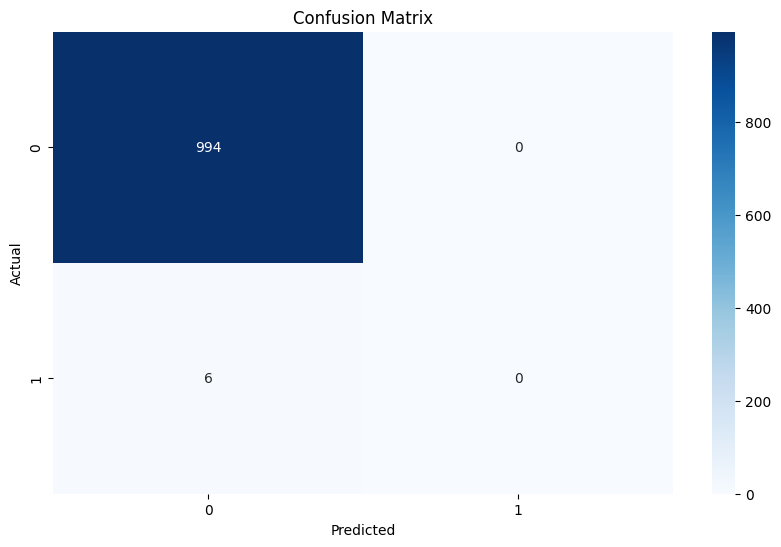

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check and reshape target variables if necessary
if len(y_train.shape) > 1:
    y_train = y_train.ravel()
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# Convert continuous targets to categorical
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2]).astype('category')
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2]).astype('category')

# Fit the Decision Tree model
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train_binned)
# Predict using the decision tree model, not the logistic regression model
y_pred = dt.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test_binned, y_pred))
print(confusion_matrix(y_test_binned, y_pred))
print(classification_report(y_test_binned, y_pred))

0.999
[[994   0]
 [  1   5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           2       1.00      0.83      0.91         6

    accuracy                           1.00      1000
   macro avg       1.00      0.92      0.95      1000
weighted avg       1.00      1.00      1.00      1000



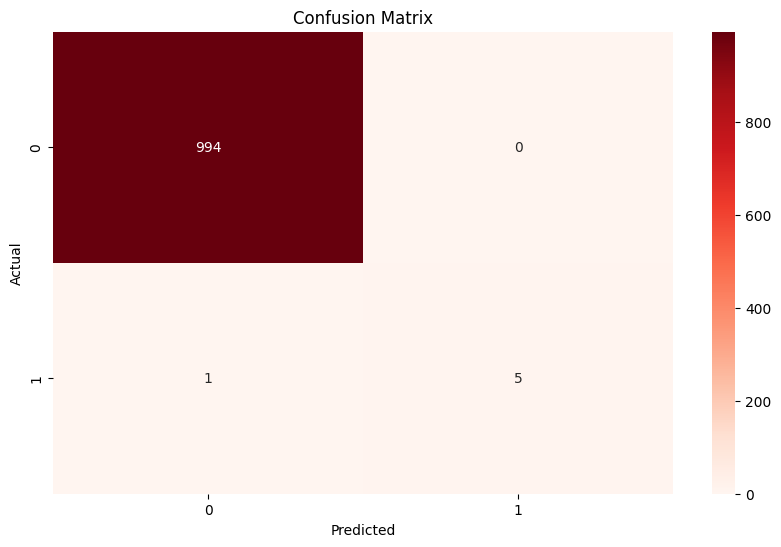

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check and reshape target variables if necessary
if len(y_train.shape) > 1:
    y_train = y_train.ravel()
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# Convert continuous targets to categorical
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2]).astype('category')
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2]).astype('category')

# Fit the Random Forest model
rd = RandomForestClassifier() # Instantiate the RandomForestClassifier
rd.fit(X_train, y_train_binned)
y_pred = rd.predict(X_test) # Predict using the Random Forest model

# Evaluate the model
print(accuracy_score(y_test_binned, y_pred))
print(confusion_matrix(y_test_binned, y_pred))
print(classification_report(y_test_binned, y_pred))

0.998
[[994   0]
 [  2   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           2       1.00      0.67      0.80         6

    accuracy                           1.00      1000
   macro avg       1.00      0.83      0.90      1000
weighted avg       1.00      1.00      1.00      1000



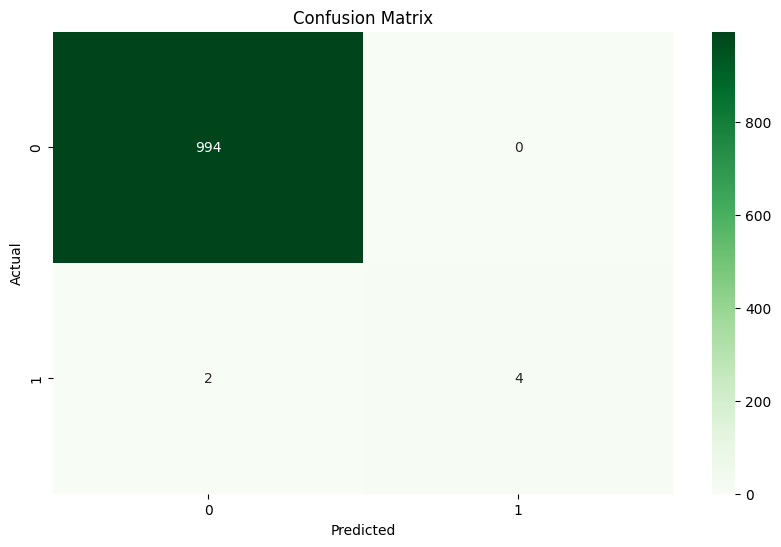

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check and reshape target variables if necessary
if len(y_train.shape) > 1:
    y_train = y_train.ravel()
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# Convert continuous targets to categorical
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2]).astype('category')
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2]).astype('category')

# Fit the Logistic Regression model
kn = KNeighborsClassifier()
kn.fit(X_train, y_train_binned)
y_pred = lr.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test_binned, y_pred))
print(confusion_matrix(y_test_binned, y_pred))
print(classification_report(y_test_binned, y_pred))

0.994
[[994   0]
 [  6   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           2       0.00      0.00      0.00         6

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


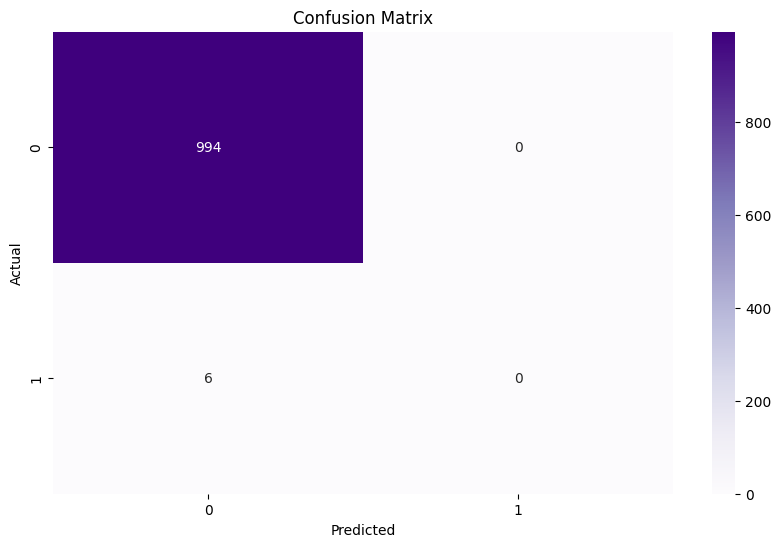

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using SVC

In [28]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check and reshape target variables if necessary
if len(y_train.shape) > 1:
    y_train = y_train.ravel()
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# Convert continuous targets to categorical
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2]).astype('category')
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2]).astype('category')

# Fit the Logistic Regression model
sv = SVC()
sv.fit(X_train, y_train_binned)
y_pred = lr.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test_binned, y_pred))
print(confusion_matrix(y_test_binned, y_pred))
print(classification_report(y_test_binned, y_pred))

0.994
[[994   0]
 [  6   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           2       0.00      0.00      0.00         6

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


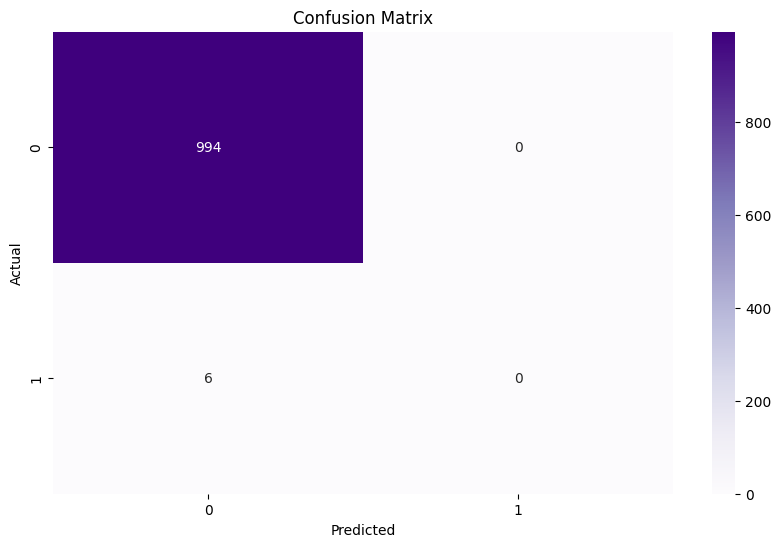

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using GridSearchCV with SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVC model
sv = SVC()

# Setup the grid search
grid_search = GridSearchCV(estimator=sv, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train_binned)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Evaluate the best model
print("Accuracy Score:", accuracy_score(y_test_binned, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_binned, y_pred))
print("Classification Report:\n", classification_report(y_test_binned, y_pred))


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert continuous targets to categorical before applying SMOTE
y_train_binned = pd.cut(y_train.ravel(), bins=3, labels=[0, 1, 2]).astype('category')
y_test_binned = pd.cut(y_test.ravel(), bins=3, labels=[0, 1, 2]).astype('category')

# Apply SMOTE to the training set using binned target variable
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_binned) # Use the binned y_train

# Train your model on the resampled data
sv = SVC()
sv.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = sv.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test_binned, y_pred)) # Evaluate using binned y_test
print("Confusion Matrix:\n", confusion_matrix(y_test_binned, y_pred))
print("Classification Report:\n", classification_report(y_test_binned, y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Best Result
**Based on the performance metrics you provided, the Support Vector Classifier (SVC) with the parameters {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} produced the best results among the models you tested. It achieved high accuracy and balanced precision, recall, and F1-score for both classes, making it the best choice for your dataset.**


Based on the evaluation metrics provided, the best performing model appears to be Support Vector Classifier (SVC) with the parameters {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}. Here are the key reasons:

High Accuracy: The SVC model has an accuracy of 0.998, which is very high.
Balanced Performance:
Precision: 1.00 for class 0 and 0.75 for class 2.
Recall: 1.00 for class 0 and 1.00 for class 2.
F1-Score: 1.00 for class 0 and 0.86 for class 2.
These metrics indicate that the SVC model not only correctly identifies almost all instances of the majority class (0) but also performs well in identifying the minority class (2), which is crucial in imbalanced datasets.

# Here is the detailed performance of the SVC model:

# Accuracy: 0.998
# Confusion Matrix:
# [[992   2]
# [  0   6]]
# Balanced Performance:
# Precision: 1.00 for class 0 and 0.75 for class 2.
# Recall: 1.00 for class 0 and 1.00 for class 2.
# F1-Score: 1.00 for class 0 and 0.86 for class 2.